# visualize data

In [1]:
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
print(df.shape)
df.head()

(100, 3)


,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
df.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


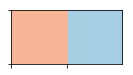

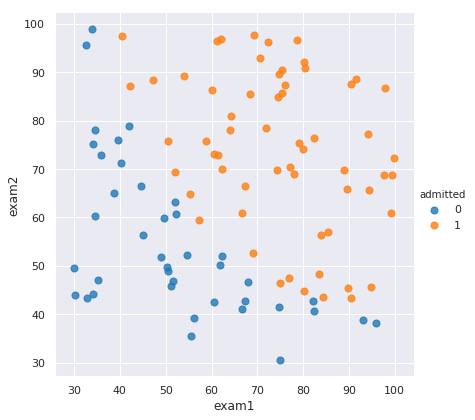

In [4]:
sns.set(context="notebook", style="darkgrid", palette=sns.palplot(sns.color_palette("RdBu", 2)))

sns.lmplot('exam1', 'exam2', hue='admitted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

# Logistic Regression

In [5]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import sys
sys.path.append('..')

from helper import logistic_regression as lr  # my own module
from helper import general as general

from sklearn.metrics import classification_report

In [6]:
# prepare data
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
X = general.get_X(data)
print(X.shape)

y = general.get_y(data)
print(y.shape)


(100, 3)
(100,)


/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/general.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data.iloc[:, :-1].as_matrix()  # this return ndarray, not matrix


## sigmoid function


Text(0.5, 1.0, 'sigmoid function')

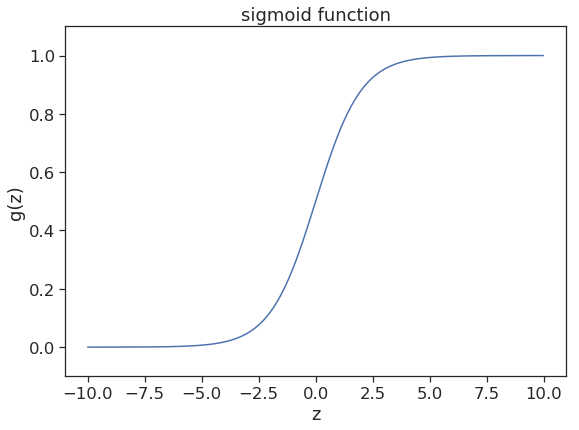

In [8]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01),
        lr.sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)

## cost function
> * $max(\ell(\theta)) = min(-\ell(\theta))$  
> * choose $-\ell(\theta)$ as the cost function

<img style="float: left;" src="img/logistic_cost.png">

In [9]:
theta = theta=np.zeros(3) # X(m*n) so theta is n*1
theta

array([0., 0., 0.])

In [10]:
lr.cost(theta, X, y)

0.6931471805599453

## gradient
* this is batch gradient  
* translate this into vector computation $\frac{1}{m} X^T( Sigmoid(X\theta) - y )$

<img style="float: left;" src="img/logistic_gradient.png">

In [11]:
lr.gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

## fit the parameter
> * here I'm using [`scipy.optimize.minimize`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize) to find the parameters  
> * and I use this model without understanding.... what is `Jacobian` ...

In [12]:
import scipy.optimize as opt

In [13]:
res = opt.minimize(fun=lr.cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.gradient)
print(res)

     fun: 0.203497714790399
     jac: array([-1.76844278e-06, -2.92606466e-04, -2.75721236e-04])
 message: 'Optimization terminated successfully.'
    nfev: 71
    nhev: 0
     nit: 28
    njev: 240
  status: 0
 success: True
       x: array([-25.15191329,   0.20615628,   0.20139546])


## predict and validate from training set
> now we are using training set to evaluate the model, this is not the best practice, but the course just begin, I guess Andrew will cover how to do model validation properlly later

In [14]:
final_theta = res.x
y_pred = lr.predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

   micro avg       0.89      0.89      0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



## find the decision boundary
http://stats.stackexchange.com/questions/93569/why-is-logistic-regression-a-linear-classifier
> $X \times \theta = 0$  (this is the line)

In [15]:
print(res.x) # this is final theta

[-25.15191329   0.20615628   0.20139546]


In [16]:
coef = -(res.x / res.x[2])  # find the equation
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

[124.8881826   -1.02363914  -1.        ]


In [17]:
data.describe()  # find the range of x and y

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Decision Boundary')

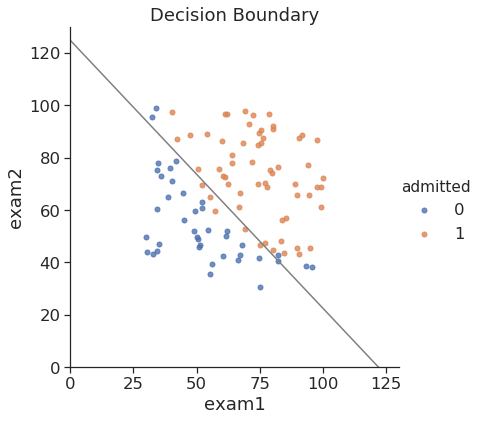

In [18]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('exam1', 'exam2', hue='admitted', data=data, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 25}
          )

plt.plot(x, y, 'grey')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')

# Regularized Logistic Regression

In [19]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append('..')

# load my own module
from helper import logistic_regression as lr  
from helper import general as general

from sklearn.metrics import classification_report

In [20]:
df = pd.read_csv('ex2data2.txt', names=['test1', 'test2', 'accepted'])
df.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


## visualize data

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Regularized Logistic Regression')

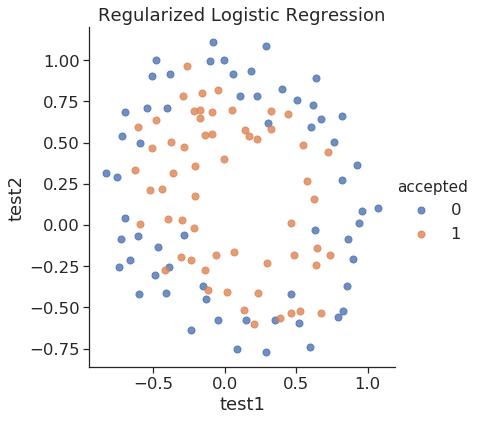

In [21]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot('test1', 'test2', hue='accepted', data=df, 
           size=6, 
           fit_reg=False, 
           scatter_kws={"s": 50}
          )

plt.title('Regularized Logistic Regression')

## feature mapping

polynomial expansion

```
for i in 0..i
  for p in 0..i:
    output x^(i-p) * y^p
```
<img style="float: left;" src="img/mapped_feature.png">

In [22]:
x1 = np.array(df.test1)
x2 = np.array(df.test2)

In [23]:
data = lr.feature_mapping(x1, x2, power=6)
print(data.shape)
data.head()

(118, 28)


,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
0,1.0,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1.0,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1.0,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1.0,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1.0,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [24]:
data.describe()

,f00,f10,f01,f20,f11,f02,f30,f21,f12,f03,...,f23,f14,f05,f60,f51,f42,f33,f24,f15,f06
count,118.0,118.000000,118.000000,118.000000,118.000000,118.000000,1.180000e+02,118.000000,118.000000,118.000000,...,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02,118.000000,1.180000e+02
mean,1.0,0.054779,0.183102,0.247575,-0.025472,0.301370,5.983333e-02,0.030682,0.015483,0.142350,...,0.018278,4.089084e-03,0.115710,7.837118e-02,-0.000703,1.893340e-02,-0.001705,2.259170e-02,-0.006302,1.257256e-01
std,0.0,0.496654,0.519743,0.248532,0.224075,0.284536,2.746459e-01,0.134706,0.150143,0.326134,...,0.058513,9.993907e-02,0.299092,1.938621e-01,0.058271,3.430092e-02,0.037443,4.346935e-02,0.090621,2.964416e-01
min,1.0,-0.830070,-0.769740,0.000040,-0.484096,0.000026,-5.719317e-01,-0.358121,-0.483743,-0.456071,...,-0.142660,-4.830370e-01,-0.270222,6.472253e-14,-0.203971,2.577297e-10,-0.113448,2.418097e-10,-0.482684,1.795116e-14
25%,1.0,-0.372120,-0.254385,0.043243,-0.178209,0.061086,-5.155632e-02,-0.023672,-0.042980,-0.016492,...,-0.001400,-7.449462e-03,-0.001072,8.086369e-05,-0.006381,1.258285e-04,-0.005749,3.528590e-04,-0.016662,2.298277e-04
50%,1.0,-0.006336,0.213455,0.165397,-0.016521,0.252195,-2.544062e-07,0.006603,-0.000039,0.009734,...,0.001026,-8.972096e-09,0.000444,4.527344e-03,-0.000004,3.387050e-03,-0.000005,3.921378e-03,-0.000020,1.604015e-02
75%,1.0,0.478970,0.646562,0.389925,0.100795,0.464189,1.099616e-01,0.086392,0.079510,0.270310,...,0.021148,2.751341e-02,0.113020,5.932959e-02,0.002104,2.090875e-02,0.001024,2.103622e-02,0.001289,1.001215e-01
max,1.0,1.070900,1.108900,1.146827,0.568307,1.229659,1.228137e+00,0.449251,0.505577,1.363569,...,0.287323,4.012965e-01,1.676725,1.508320e+00,0.250577,2.018260e-01,0.183548,2.556084e-01,0.436209,1.859321e+00


## regularized cost
<img style="float: left;" src="img/reg_cost.png">

In [25]:
theta = np.zeros(data.shape[1])
X = lr.feature_mapping(x1, x2, power=6, as_ndarray=True)
print(X.shape)

y = general.get_y(df)
print(y.shape)

(118, 28)
(118,)


/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/logistic_regression.py:48: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return pd.DataFrame(data).as_matrix()


In [26]:
lr.regularized_cost(theta, X, y, l=1)

0.6931471805599454

## regularized gradient
<img style="float: left;" src="img/reg_gradient.png">

In [27]:
lr.regularized_gradient(theta, X, y)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

## fit the parameters

In [28]:
import scipy.optimize as opt

In [29]:
print('init cost = {}'.format(lr.regularized_cost(theta, X, y)))

res = opt.minimize(fun=lr.regularized_cost, x0=theta, args=(X, y), method='Newton-CG', jac=lr.regularized_gradient)
res

init cost = 0.6931471805599454


     fun: 0.5290027297127632
     jac: array([ 1.10349034e-07, -2.00895423e-08,  6.09214122e-08, -3.57101202e-08,
        4.06100495e-08, -2.63723395e-08, -1.19182466e-08, -1.43957923e-08,
        7.45732179e-09,  3.17805278e-08, -1.89768065e-08, -2.21907270e-09,
       -6.18816511e-09,  5.81093635e-09,  3.06575125e-08, -6.25877682e-09,
       -8.46696743e-09, -2.52134135e-09, -8.90729398e-10, -1.93658943e-09,
        2.40914195e-08, -2.98844528e-08, -1.96785755e-09, -1.87630875e-09,
        2.42076508e-09, -4.37677713e-09, -2.81060480e-10, -6.45035864e-09])
 message: 'Optimization terminated successfully.'
    nfev: 7
    nhev: 0
     nit: 6
    njev: 72
  status: 0
 success: True
       x: array([ 1.27274073,  0.62527234,  1.18108872, -2.01996188, -0.91742354,
       -1.43166685,  0.12400654, -0.36553534, -0.35723938, -0.17513043,
       -1.45815601, -0.05098995, -0.61555483, -0.27470692, -1.19281488,
       -0.24218776, -0.20600655, -0.0447309 , -0.27778455, -0.29537851,
       -0.4

In [30]:
final_theta = res.x
y_pred = lr.predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        60
           1       0.78      0.91      0.84        58

   micro avg       0.83      0.83      0.83       118
   macro avg       0.84      0.83      0.83       118
weighted avg       0.84      0.83      0.83       118



# experiment with lambda constant for regularization

In [31]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')

# load my own module
from helper import logistic_regression as lr

/media/singhals/hdd/My Implementation/Coursera-ML-AndrewNg-master/helper/logistic_regression.py:105: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  inner_product = mapped_cord.as_matrix() @ theta
/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


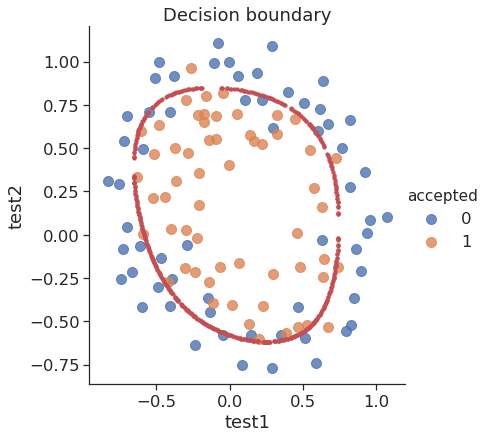

In [32]:
lr.draw_boundary(power=6, l=1)


/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


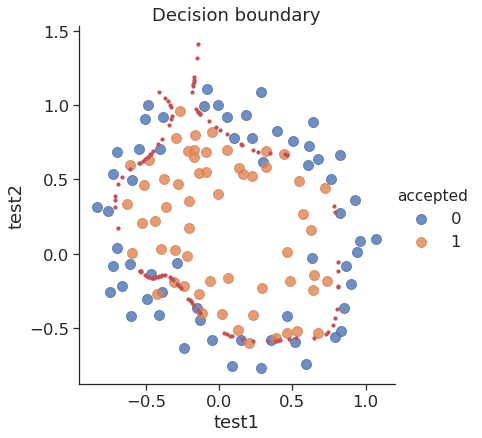

In [33]:
lr.draw_boundary(power=6, l=0)  # no regularization, over fitting

/home/singhals/anaconda2/envs/MaskRCNN/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


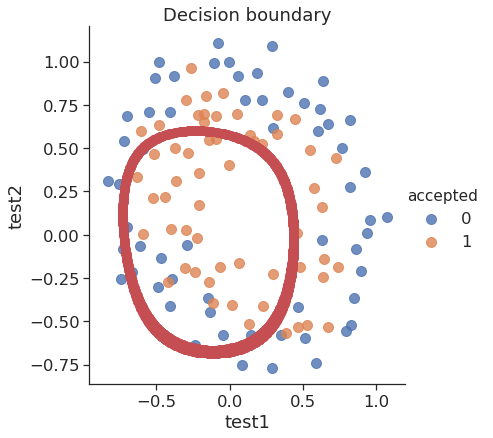

In [34]:
lr.draw_boundary(power=6, l=100)  # underfitting